<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/1033_(auc62)Fundus_images_cnn_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Normal Fundus Images/spilt/train')

['left eye fundus', 'right eye fundus']

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

traindata = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/spilt/train',
                                        target_size=(32,32),
                                        class_mode='binary')

valdata = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/spilt/val',
                                        target_size=(32,32),
                                        class_mode='binary')

testdata = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/spilt/test',
                                        target_size=(32,32),
                                        class_mode='binary')


Found 721 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [196]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(32,(3,3), activation='relu'),
                    MaxPooling2D(2,2),



                    Flatten(),
                    Dense(512, activation='relu'),

                    Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 2, 2, 32)        

In [219]:
model.fit(traindata,
          batch_size=32,
          epochs=4,
          validation_data=valdata)
model.save('binary_model.keras')

Epoch 1/4
23/23 [==============================] - 12s 540ms/step - loss: 0.1642 - accuracy: 0.9390 - val_loss: 0.1992 - val_accuracy: 0.9175
Epoch 2/4
23/23 [==============================] - 10s 420ms/step - loss: 0.1333 - accuracy: 0.9584 - val_loss: 0.1802 - val_accuracy: 0.9272
Epoch 3/4
23/23 [==============================] - 9s 385ms/step - loss: 0.1147 - accuracy: 0.9653 - val_loss: 0.1729 - val_accuracy: 0.9175
Epoch 4/4
23/23 [==============================] - 9s 394ms/step - loss: 0.1119 - accuracy: 0.9598 - val_loss: 0.1581 - val_accuracy: 0.9320


In [250]:
predictions = model.predict(testdata)

4/4 [==============================] - 1s 199ms/step


In [251]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [151]:
y_true = testdata.classes

In [252]:
from sklearn import metrics
metrics.confusion_matrix(y_true, predictions)

array([[33, 20],
       [20, 33]])

In [253]:
print(metrics.classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        53
           1       0.62      0.62      0.62        53

    accuracy                           0.62       106
   macro avg       0.62      0.62      0.62       106
weighted avg       0.62      0.62      0.62       106



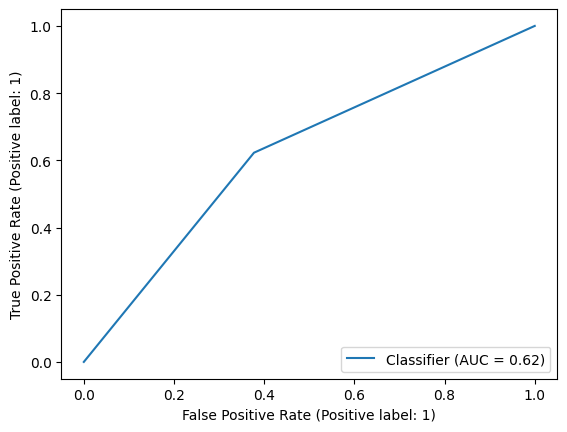

In [254]:
metrics.RocCurveDisplay.from_predictions(y_true, predictions)

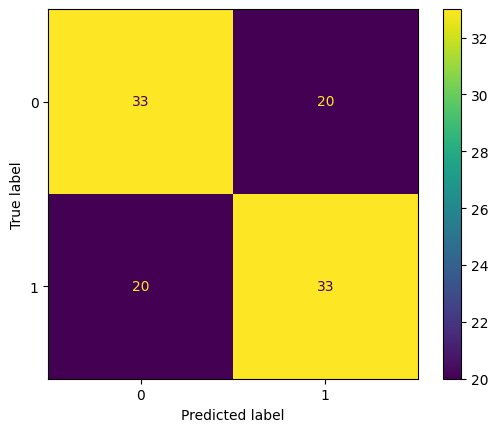

In [255]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, predictions)